<a href="https://colab.research.google.com/github/PiotrDrajewicz/Digit-Classifier/blob/main/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import os
root = '/content/gdrive/My Drive/colab/tm2020/Grupa_5/Projekt 1'  #ścieżka do katalogu roboczego na dysku google
os.chdir(root)

# Wczytywanie nagrań i zapis ich wektorów do pliku


1.   metoda "pickle_array_in" 

  *   przy zapisie wektora audio zastosowałem metodę 'append' - rozdzielenie wektorów względem mówców, do każdego mówcy można się dostać osobno, zmieniając indeks.

In [ ]:
#Funkcja piklująca pliki audio jako jeden wektor dla wybranej cyfry
import glob
from scipy.io import wavfile
import pickle

def array_in(dirname, path):
  audiovector = []
  for filename in glob.glob(os.path.join(path, str(dirname))):
    samplerate, data = wavfile.read(filename)
    data=data.astype('float64')
    audiovector.append(data)
  return audiovector  

In [ ]:
trainPath = "/content/gdrive/MyDrive/colab/tm2020/Grupa_5/Projekt 1/Projekt I nagrania"
trainSet=[]
for i in range(10):
  dirname=str('*'+str(i)+'_.wav')
  trainSet.append(array_in(dirname,trainPath))

outname = open('cyfry', "wb")
pickle.dump(trainSet, outname)
outname.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  if __name__ == '__main__':


In [ ]:
import os
os.listdir(trainPath)

In [ ]:
evalIApath = "/content/gdrive/MyDrive/colab/tm2020/Grupa_5/Projekt 1/eval_ia"
evalPath = "/content/gdrive/MyDrive/colab/tm2020/Grupa_5/Projekt 1/eval_"

In [ ]:
files=os.listdir(evalIApath)
sorted=sorted(files)

In [ ]:
  import glob
  evalIA=[]
  for i in range(len(os.listdir(evalIApath))):
    for filename in glob.glob(os.path.join(evalIApath, sorted[i])):
      samplerate, data = wavfile.read(filename)
      data=data.astype('float64')
      evalIA.append(data)

outname = open('evalIA', "wb")
pickle.dump(evalIA, outname)
outname.close()

  eval=[]
  for i in range(len(os.listdir(evalPath))):
    for filename in glob.glob(os.path.join(evalPath, sorted[i])):
      samplerate, data = wavfile.read(filename)
      data=data.astype('float64')
      eval.append(data)

outname = open('eval', "wb")
pickle.dump(eval, outname)
outname.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  app.launch_new_instance()


# Odczyt wektorów z pliku

In [ ]:
#Funkcja wczytująca plik typu pickle z dysku
import numpy as np
import pickle
def pickle_out(picklename): 
    num = open(str(picklename), 'rb')
    name = pickle.load(num)
    return name

In [ ]:
cyfry=pickle_out('cyfry')
evalIA=pickle_out('evalIA')
eval=pickle_out('eval')

# Parametryzacja zbioru wektorów

1.   Zmiana sposobu zapisu obliczonego mfcc do listy
>*  Na wzór wielowymiarowej listy nagrań powstała wielowymiarowa lista
  macierzy mfcc, która umożliwia intuicyjny dostęp do poszczególnych nagrań mówców. Indeksy reprezentują kolejno cyfrę i mówcę.

Przykład: mfccs[0][0] - dostęp do macierzy mfcc nagrania cyfry 0 mówcy 0.


In [ ]:
#funkcja parametryzująca
def calculate_mfcc(y, sr, n_mfcc, n_mels = 128): # funkcja licząca macierze mfcc
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_mels = n_mels)
  mfcc = mfcc.T #ważne
  return mfcc

In [ ]:
#funkcja licząca macierze mfcc
def eval_calculate_mfcc(y, sr, n_mfcc, width, order, mode, n_mels = 128):
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_mels = n_mels)
  mfcc = mfcc.T #ważne
  mfcc = librosa.feature.delta(mfcc, width=width, order=order, axis=0, mode=mode)
  return mfcc 

In [ ]:
import librosa
#obliczenie mfcc i zapis do listy tymczasowej
mfccsTemp=[]
Fs = 16000
for i in range(10):
  mfccsTemp.append([])
  for j in range(22):
    mfccsTemp[i].append(calculate_mfcc(cyfry[i][j], sr=Fs, n_mfcc=12))

**Przygotowywanie macierzy MFCC do badania hiperparametru dla różnej ilości filtrów melowych oraz porównanie czasu ich wytwarzania**

In [ ]:
import time
start = time.time()
mfccs32=[]
Fs = 16000
for i in range(10):
  mfccs32.append([])
  for j in range(22):
    mfccs32[i].append(calculate_mfcc(cyfry[i][j], sr=Fs, n_mfcc=12, n_mels= 32))
end = time.time()
print('Czas tworzenia MFCC dla 32 komponentów: ' + str(end - start))

start = time.time()
mfccs64=[]
Fs = 16000
for i in range(10):
  mfccs64.append([])
  for j in range(22):
    mfccs64[i].append(calculate_mfcc(cyfry[i][j], sr=Fs, n_mfcc=12, n_mels = 64))
end = time.time()
print('Czas tworzenia MFCC dla 64 komponentów: '+ str(end - start))

mfccs128=[]
Fs = 16000
for i in range(10):
  mfccs128.append([])
  for j in range(22):
    mfccs128[i].append(calculate_mfcc(cyfry[i][j], sr=Fs, n_mfcc=12, n_mels = 128))
end = time.time()
print('Czas tworzenia MFCC dla 128(domyślnie) komponentów: '+ str(end - start))

outname32 = open('mfccs32', "wb")
pickle.dump(mfccs32, outname32)
outname32.close()

outname64 = open('mfccs64', "wb")
pickle.dump(mfccs64, outname64)
outname64.close()

outname128 = open('mfccs128', "wb")
pickle.dump(mfccs128, outname128)
outname128.close()

Czas tworzenia MFCC dla 32 komponentów: 0.9057755470275879
Czas tworzenia MFCC dla 64 komponentów: 1.1314747333526611
Czas tworzenia MFCC dla 128(domyślnie) komponentów: 2.7703514099121094


**Funkcja przygotowująca macierze MFCC dla 64 filtrów melowych do badania wyników po uwzględnieniu pochodnych cech**

In [ ]:
import time
import random

def prepare_mfcc(n_mels, width, order, mode):
  start = time.time()
  mfccs64_2=[]
  Fs = 16000
  for i in range(10):
    mfccs64_2.append([])
    for j in range(22):
      mfccs64_2[i].append(librosa.feature.delta((calculate_mfcc(cyfry[i][j], sr=Fs, n_mfcc=12, n_mels = n_mels)), width=width, order=order, axis=0, mode=mode))
  end = time.time()
  return mfccs64_2

**Komentarz**

```
np.shape(mfccsTemp[0][0]) 
OUTPUT: (18,12)
```


Długość mfcc jednego nagrania jednego mówcy to 18 ramek.

Pakiet "librosa" domyślnie przybiera rozmiar ramki 2048 bitów/s, co przy próbkowaniu 16 kHz daje informację, że jedna ramka to 128 ms.

Więc czas potrzebny na nagranie słowa "zero" to 18*0,128 = 2,34 s - zgadza się z faktycznym stanem, więc mfcc zostało policzone poprawnie.

In [ ]:
#Zapis listy tymczasowej mfcc do pliku, żeby przy następnym uruchomieniu
#program nie musiał liczyć mfcc od nowa tylko korzystał z zapisanych
import pickle
outname = open('mfccs', "wb")
pickle.dump(mfccsTemp, outname)
outname.close()

# Przygotowanie danych do treningu modeli


1.   Implementacja metody leave-one-out

 > * Metoda przyjmuje tylko jeden argument i zwraca słownik, co maksymalnie upraszcza dostęp do wyników pożądanych przez użytkownika.

**Implementacja metody leave-one-out**

In [ ]:
def leave1out(mfccs, index):
  mfcc = mfccs
  left=[]
  out=[]
  for i in range(10):
    out.append([])
    left.append(mfcc[i][index])
    del mfcc[i][index]
    for j in range(21):
      out[i].extend(mfcc[i][j])
  result = {
    "index":index,
    "left":left,
    "out":out
  }
  return result

**Przygotowanie zbioru treningowego metodą leave-one-out**

 *Oraz wyeksportowanie dodatkowych zbiorów do testowania hiperparametrów*

In [ ]:
'''
 uwaga: przed każdym uruchomieniem należy ponownie wczytać zapisany plik "mfccs" z dysku google (linijka 10)
 w przeciwnym razie metoda będzie usuwać mówców z tego samego zbioru.
 Można to obejść poprzez wczytanie pliku już w środku metody, jednak to rozwiązanie
 jest dyskusyjne.'''

import random
index=random.randint(0,21)

mfccs=pickle_out('mfccs')
print(np.shape(mfccs))
x=leave1out(mfccs,index)
train=x.get("out")
test=x.get("left")
print(np.shape(mfccs))
mfccs32=pickle_out('mfccs32')
x32=leave1out(mfccs32, index)
train32=x32.get("out") 
test32=x32.get("left")

mfccs64=pickle_out('mfccs64')
x64=leave1out(mfccs64,index)
train64=x64.get("out") 
test64=x64.get("left")

print(("Ze wszystkich zbiorów usunięto mfcc nagrania o indeksie: ")+ str(index))

(10, 22)
(10, 21)
Ze wszystkich zbiorów usunięto mfcc nagrania o indeksie: 12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**Komentarz**


```
np.shape(train[0])
OUTPUT: (424,12)
```
Metoda działa poprawnie - zwraca zbiór 424 próbek (wszystkie nagrania cyfry 0 oprócz usuniętego z indeksem 14) i 12 cech mfcc

dodatkowo jeden mówca jest usunięty ponieważ:


```
np.shape(test)
OUTPUT: (10,)
```
Istnieje niepusty zbiór mfcc o rozmiarze 10x1 - znajdują się
w nim nagrania mówcy usuniętego ze zbioru treningowego.




# Funkcja trenująca model GMM
Funkcja trenująca model GMM na podstawie otrzymanej macierzy MFCC.

In [ ]:
from sklearn import mixture

# funkcja trenująca model GMM                                                
def train_gmm(mfcc, n, cov_type):                                                 
    gmm = mixture.GaussianMixture(n_components=n, covariance_type=cov_type,tol=0.001,
                                  reg_covar=1e-06, max_iter=100,n_init=1,init_params='kmeans',
                                  weights_init=None, means_init=None, precisions_init=None, random_state=1,
                                  verbose=0, verbose_interval=10);
    model=gmm.fit(mfcc)
    return model

# Funkcja klasyfikująca
Na wejście funkcji podawana jest lista modeli GMM (każdy model jest odpowiedzialny za jedną cyfrę)
oraz macierz MFCC klasyfikowanego nagrania. Macierz MFCC trafia po kolei do każdego modelu GMM, 
gdzie wyliczana jest wartość score, która następnie jest przekazywana do listy. 
Po skończeniu tego procesu, z listy wybierana jest największa wartość score i na podstawie jej indeksu określane jest jaką cyfrę wypowiedział mówca.

In [ ]:
# funkcja klasyfikująca na podstawie wartości score                                                                   
def test_fun(gmms, mfcc):  
  scoresList=[]                                                           
  for t in range(len(gmms)):                                                      
    scoresList.append(gmms[t].score(mfcc))                                        
  max_val, val_index = (max(scoresList), scoresList.index(max(scoresList)))                                                     
  return val_index

def testgmmscores(gmms, mfcc):
  scoresList=[]                                                             
  for t in range(len(gmms)):                                                      
    scoresList.append(gmms[t].score(mfcc))                                        
  max_val = max(scoresList)
  val_index = scoresList.index(max(scoresList))

In [ ]:
# funkcja klasyfikująca na podstawie wartości score dla zbioru ewaluacyjnego                                                                   
def eval_test_fun(gmms,mfccs_group , mfcc):
  scoresList=[]                                                           
  for t in range(len(gmms)):                                                      
    scoresList.append(gmms[t].score(mfcc))                                     
  max_val, val_index = (max(scoresList), scoresList.index(max(scoresList)))                                            
  return val_index, max_val

1. Przeprowadzenie badania:


>*   Tworzenie zbioru treningowego i testowego - wyodrębnienie z całego zbioru jednego losowego mówcy, którego 10 nagrań posłuży jako zbiór testowy. Nagrania pozostałych 21 mówców posłużą jako zbiór treningowy.
*   Trening modeli GMM - wytrenowanie, za pomocą zbioru treningowego, 10 modeli GMM, gdzie każdy odpowiada za jedną cyfrę.
*   Test - przeprowadzenie klasyfikacji dla wcześniej wydzielonego zbioru testowego (10 nagrań jednego mówcy). Wybieranie najwyższej wartości score dla danego nagrania.
*   Wyznaczenie skuteczności składowej - wyznaczenie skuteczności systemu na podstawie zbadania 10 nagrań jednego mówcy.
*   Schemat powtarzany jest 22 razy (dla każdego mówcy) - w efekcie otrzymujemy 22 wartości skuteczności składowej, za pomocą których wyznaczymy skuteczność ogólną systemu.
*   Wyznaczenie skuteczności ogólnej - wyznaczenie ogólnej skuteczności systemu na podstawie wszystkich nagrań z całego zbioru. Wartość skuteczności ogólnej to uśredniona wartość recognition rate ze wszystkich 22 testów.



In [ ]:
def RecognitionRate(mfcc = 'mfccs', comp = 8, cov = 'diag'):
  import time
  start = time.time()
  rates=[]
  for p in range(22):
    # tworzenie zbioru treningowego i testowego (10 nagrań jednego losowego mówcy)
    mfccs=pickle_out(mfcc)
    x=leave1out(mfccs,p)
    train=x.get("out") #zbiór treningowy
    test=x.get("left") #zbiór walidacyjny

    # trening modeli GMM (10 modeli GMM, każdy do rozpoznania jednej cyfry)
    gmmsList=[]
    for i in range(len(train)):
      gmmsList.append(train_gmm(train[i], comp, cov))
    
    # test (jednego mówcy - 10 nagrań)
    klasyfikacje=[]
    for k in range(10):
      klasyfikacje.append(test_fun(gmmsList, test[k]))
   
    # wyznaczenie skuteczności składowej (na podstawie pojedynczego mówcy)
    import sklearn
    true = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    rate = sklearn.metrics.accuracy_score(true, klasyfikacje, normalize=True, sample_weight=None)
    rates.append(rate)

  # wyznaczenie skuteczności ogólnej (na podstawie całego zbioru)
  main_rate = np.around((sum(rates)/len(rates)), 4)
  end = time.time()
  time=np.around((end-start), 4)
  result = {
    "time":time,
    "rate":main_rate,
  }
  return result

# Porównanie hiperparametrów
Poniższa funkcja porównuje 3 hiperparametry dla wybranego indeksu mówcy:
- Wpływ ilości filtrów melowych na recognition rate
- Wpływ typu kowariancji na recognition rate
- Wpływ ilości komponentów na recognition rate
- Czas potrzebny na wykonanie funkcji o różny parametrach

Wyniki zostały przedstawione w postaci wykresów barowych

*   Użytkownik może podawać dowolne wartości sprawdzanych hiperparametrów poprzez podanie ich zbioru przy wywołaniu funkcji. 
```
Wersja 6.12.2020
'''
def Hiperparametr_Comparison(mfccs,ncomp,covtypes):
for i in range(len(mfccs)):
    for j in range(len(ncomp)):
      for k in range(len(covtypes)):
        temp=RecognitionRate(mfccs[i],ncomp[j],covtypes[k])
```



2. Usprawnienie metody badań za sprawą poprawy kodu metody


> * Ustawienie wartości random_state przy treningu modelu daje pewność, że wyniki nie będą się zmieniać co iterację oraz ułatwiło to badania nad optymalnym zestawem hiperparametrów. 
  * Badanie 1: Porównanie 3 różnych ilość filtrów melowych, modelu o 2,4,6 i 8 komponentach, o obu typach macierzy cov.:
```
mfccSet=['mfccs32','mfccs64','mfccs128']
compSet=[2, 4 ,6, 8]
covtypeSet=['diag', 'full']
Hiperparametr_Comparison(mfccSet,compSet,covtypeSet)
'
Wniosek: Z uwagi na niskie wyniki skuteczności odrzucamy badania nad mfccs128, porzucamy też stosowanie 2 i 8 komponentów w modelu oraz pełnej macierzy kowariancji.
```
  * Badanie 2: Zakres do wyboru najlepszych parametrów zawęził się do:
```
mfccSet2=['mfccs32','mfccs64']
compSet2=[4 ,6]
covtypeSet2=['diag']
Hiperparametr_Comparison(mfccSet2,compSet2,covtypeSet2)
```









In [ ]:
import matplotlib.pyplot as plt
def Hiperparametr_Comparison(mfccs,ncomp,covtypes):
  times = []
  RRList = []
  labels=[]
  for i in range(len(mfccs)):
    for j in range(len(ncomp)):
      for k in range(len(covtypes)):
        temp=RecognitionRate(mfccs[i],ncomp[j],covtypes[k])
        RRList.append(temp.get("rate"))
        times.append(temp.get("time"))
        labels.append((str(mfccs[i]) +' '+str(ncomp[j])+' '+str(covtypes[k])))
  return RRList, times, labels

def bars(RRTab,times,labels):
  x = np.arange(len(RRTab))
  fig, axes = plt.subplots(ncols=1, nrows=1)
  plt.title('Recognition Rate')
  plt.xlabel('Method')
  plt.ylabel('Rate')
  axes.bar(x, RRTab, color = 'blue', align = 'center')
  plt.xticks(x,labels,rotation='vertical')
  plt.show()
    
  fig, axes = plt.subplots(ncols=1, nrows=1)
  plt.title('Operation Time')
  plt.xlabel('Method')
  plt.ylabel('Time [s]')
  axes.bar(x, times, color = 'red', align = 'center')
  plt.xticks(x,labels,rotation='vertical')
  plt.show()

In [ ]:
#Użytkownik podaje jakie parametry chce porównać
mfccSet=['mfccs32','mfccs64','mfccs128']
compSet=[2,4,6,8]
covtypeSet=['diag','full']

In [ ]:
RRTab, times,labels=Hiperparametr_Comparison(mfccSet,compSet,covtypeSet)

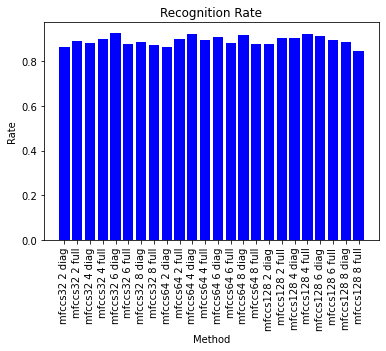

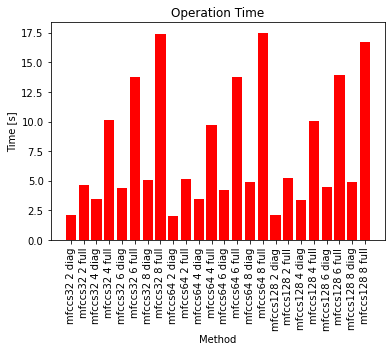

1: mfccs32 2 diag
 Skuteczność: 86.36 [%]
 Czas wykonywania: 2.0879 [s]

2: mfccs32 2 full
 Skuteczność: 89.09 [%]
 Czas wykonywania: 4.664 [s]

3: mfccs32 4 diag
 Skuteczność: 88.18 [%]
 Czas wykonywania: 3.4865 [s]

4: mfccs32 4 full
 Skuteczność: 90.0 [%]
 Czas wykonywania: 10.0863 [s]

5: mfccs32 6 diag
 Skuteczność: 92.73 [%]
 Czas wykonywania: 4.3617 [s]

6: mfccs32 6 full
 Skuteczność: 87.72999999999999 [%]
 Czas wykonywania: 13.7449 [s]

7: mfccs32 8 diag
 Skuteczność: 88.64 [%]
 Czas wykonywania: 5.0987 [s]

8: mfccs32 8 full
 Skuteczność: 87.27000000000001 [%]
 Czas wykonywania: 17.3529 [s]

9: mfccs64 2 diag
 Skuteczność: 86.36 [%]
 Czas wykonywania: 1.9854 [s]

10: mfccs64 2 full
 Skuteczność: 90.0 [%]
 Czas wykonywania: 5.1108 [s]

11: mfccs64 4 diag
 Skuteczność: 92.27 [%]
 Czas wykonywania: 3.4275 [s]

12: mfccs64 4 full
 Skuteczność: 89.55 [%]
 Czas wykonywania: 9.7346 [s]

13: mfccs64 6 diag
 Skuteczność: 90.91 [%]
 Czas wykonywania: 4.2306 [s]

14: mfccs64 6 full
 Sku

In [ ]:
#graficzne przedstawienie wyników
bars(RRTab,times,labels)
for i in range(len(RRTab)):
  print(str(i+1) + ': '+ str(labels[i])+ '\n Skuteczność: '+ str(RRTab[i]*100) +' [%]' + '\n Czas wykonywania: ' + str(times[i])+' [s]'+'\n')

**Wnioski porównania**

Najlepszą skutecznością (zależnie od próby) wykazują się funkcje z diagonalnym typem kowariancji oraz dla 64 filtrów melowych.
Biorąc pod uwagę czas jaki zajmuje stworzenie macierzy MFCC dla 128 filtrów melowych oraz nieznaczne różnice Recognition Rate z innymi macierzami, wykluczam dalsze badania  'mfccs128'. Czas jaki był potrzebny na taką operację jest znacząco wyższy w porównaniu do skuteczności jaką reprezentował (porównanie  możemy znaleźć w podpunkcie "Parametryzacja zbioru wektorów").

Z tych względów wybrałem parametry RR64C4 jako dalszy cel analizy, czyli: 
- **64 filtry melowe**
- **4 komponenty**
- **diagonalny typ kowariancji**

Można zauważyć, że dla naszego zbioru danych o jednakowych hiperparametrach, 8 komponentów mikstury Gaussowskiej doprowadzało do przetrenowania modelu, co objawiało się skutecznością niższą niż skuteczność dla 6 komponentów. Gorsze wyniki osiągały też modele z pełną macierzą kowariancji, zapewne z powodu zbyt małej ilości danych wejściowych potrzebnych aby poprawnie wypełnić całą macierz wartościami oczekiwanymi.

# Pierwsze pochodne cech
Na podstawie wyników wcześniejszych testów, badania z użyciem pierwszych pochodnych cech rozpocząłem dla opcji z 64 filtrami melowymi, diagonalnym typem kowariancji oraz 6 komponentami GMM (wybrałem 6 zamiast 4, ponieważ dzięki wstępnym testom zauważyłem, że takie ustawienie dawało lepsze wyniki). Dane badanie zakończyłem na obliczaniu pochodnych na podstawie 11 ramek, ponieważ większa ich ilość dawała stopniowo gorsze efekty.


In [ ]:
#tworzenie mfcc o badanych parametrach
mfccsDelta=[]
for i in range(10):
  mfccsDelta.append([])
  for j in range(22):
    mfccsDelta[i].append((eval_calculate_mfcc(cyfry[i][j], sr=16000, n_mfcc=12,width=3,order=1,mode='constant',n_mels=64)))

outfile=open('mfccsDelta','wb')
pickle.dump(mfccsDelta,outfile)
outfile.close()

Tabela 1. Skuteczność ogólna i czas operacji w zależności od różnych wartości parametrów funkcji obliczającej pierwsze pochodne cech.

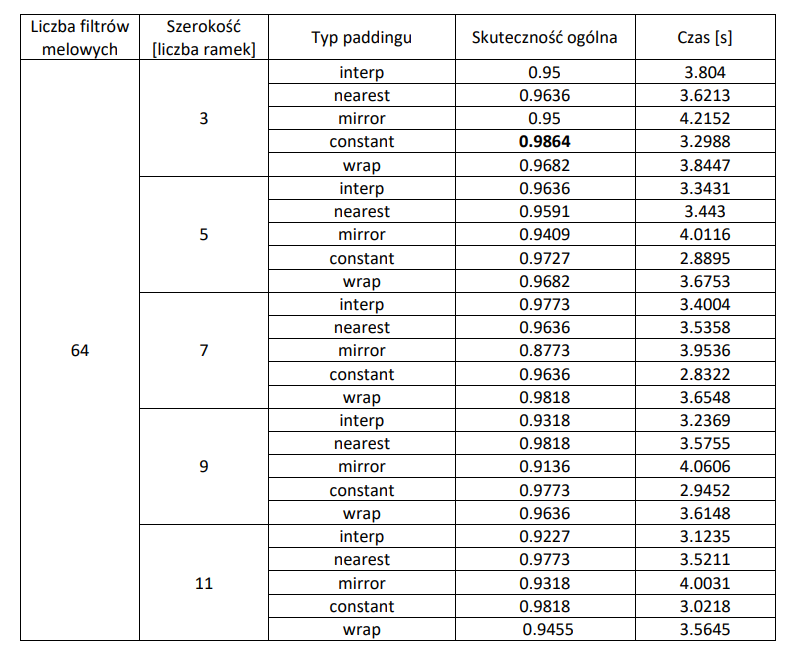

Z powyższej tabeli możemy zauważyć, że największa wartość skuteczności ogólnej została zwrócona dla szerokości równej 3 ramki (width=3 - ilość ramek, na podstawie których obliczane są pierwsze pochodne) oraz paddingu typu constant (mode='constant') i wynosi 0,9864 (w przybliżeniu 99%). Biorąc pod uwagę, że skuteczność przed zastosowaniem pierwszych pochodnych cech wynosiła 90%, jest to znaczne ulepszenie systemu. Czas potrzebny na wykonanie tej operacji jest krótki i w porównaniu z innymi próbami wypada bardzo korzystnie.

W celu sprawdzenia czy możliwe jest otrzymanie lepszych wyników dla powyższej konfiguracji funkcji liczącej pochodne, przeprowadziłem również testy dla opcji z 32 oraz 128 filtrami melowymi.

Tabela 2. Skuteczność ogólna i czas operacji z wykorzystaniem funkcji obliczającej pierwsze pochodne cech (width=3, mode='constant') dla opcji z różną liczbą filtrów melowych.

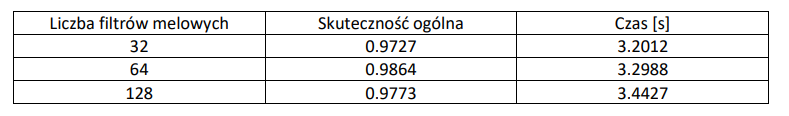

Na podstawie powyższej tabeli można stwierdzić, że wariant z 64 filtrami melowymi zwrócił największą wartość skuteczności ogólnej. Czas wykonywania danej operacji nie jest długi, dlatego na bazie tych parametrów zostaną przeprowadzone kolejne testy.

**Przeprowadzenie dalszych badań dla różnej liczby komponentów GMM**

Bazując na parametrach, które do tej pory przyjąłem za najskuteczniejsze (64 filtry melowe, diagonalny typ kowariancji, szerokość delt 3 ramki oraz typ paddingu stały), zbadałem czy zmiana liczby komponentów GMM na tym etapie może pomóc w osiągnięciu lepszych wyników.

In [ ]:
filename='mfccsDelta'
for p in range(2,16,2):
  print('wynik dla '+str(p)+' komponentów GMM: '+str(RecognitionRate(mfcc = filename, comp = p, cov = 'diag')))

wynik dla 2 komponentów GMM: {'time': 1.2821, 'rate': 0.8091}
wynik dla 4 komponentów GMM: {'time': 2.2038, 'rate': 0.9455}
wynik dla 6 komponentów GMM: {'time': 3.523, 'rate': 0.9864}
wynik dla 8 komponentów GMM: {'time': 4.2561, 'rate': 0.9773}
wynik dla 10 komponentów GMM: {'time': 7.5279, 'rate': 0.9773}
wynik dla 12 komponentów GMM: {'time': 8.5623, 'rate': 0.9909}
wynik dla 14 komponentów GMM: {'time': 6.1924, 'rate': 0.9864}


Można zauważyć, iż największą poprawę skuteczności, bo z 0,9864 na 0,9909, przyniosła zmiana liczby komponentów na 12. Z takim ustawieniem skuteczność ogólna systemu wynosi w przybliżeniu 99%, jednak czas wykonywania operacji wydłużył się o 2 sekundy. Nie przeprowadzałem testów dla większej ilości komponentów, ponieważ skuteczność nie ulegała już poprawie, natomiast czas wykonywania operacji znacznie się wydłużał.

# Drugie pochodne cech

W podobny sposób, tak jak przy pierwszych pochodnych cech, zbadałem wpływ drugich pochodnych cech na skuteczność systemu. Rozpocząłem od takich samych ustawień, tj. 64 filtry melowe, diagonalny typ kowariancji oraz 6 komponentów GMM. Również zakończyłem badanie na szerokości pochodnych wynoszącej 11 ramek.

In [ ]:
#tworzenie mfcc o badanych parametrach
mfccsDelta2=[]
for i in range(10):
  mfccsDelta2.append([])
  for j in range(22):
    mfccsDelta2[i].append((eval_calculate_mfcc(cyfry[i][j], sr=16000, n_mfcc=12,width=11,order=2,mode='constant',n_mels=32)))

outfile=open('mfccsDelta2','wb')
pickle.dump(mfccsDelta2,outfile)
outfile.close()

Tabela 3. Skuteczność ogólna i czas operacji w zależności od różnych wartości parametrów funkcji obliczającej drugie pochodne cech.

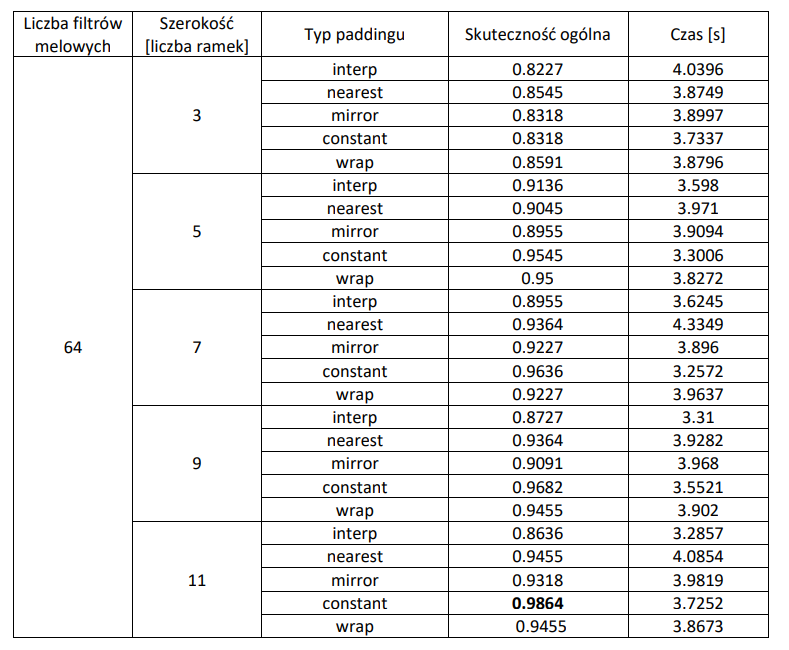

Największa wartość skuteczności ogólnej została zwrócona dla paddingu typu constant dla 11 ramek szerokości, dlatego to ustawienie zostanie wykorzystane do kolejnych testów.

Następnie sprawdziłem daną konfigurację dla 32 oraz 128 filtrów melowych.

Tabela 4. Skuteczność ogólna i czas operacji z wykorzystaniem funkcji obliczającej drugie pochodne cech (width=11, mode='constant') dla opcji z różną liczbą filtrów melowych.

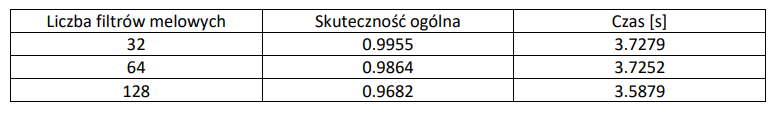

Można zauważyć, że wariant z 32 filtrami melowymi zwrócił największą wartość skuteczności. Dodatkowo czas wykonywania tej operacji jest praktycznie taki sam jak dla 64 filtrów melowych. Na podstawie tych wyników, do dalszych badań zastosowałem opcję z 32 filtrami melowymi.

**Przeprowadzenie dalszych badań dla różnej liczby komponentów GMM**

Bazując na parametrach, które do tej pory przyjąłem za najskuteczniejsze (32 filtry melowe, diagonalny typ kowariancji, szerokość delt 11 ramek oraz typ paddingu constant), zbadałem czy zmiana liczby komponentów GMM na tym etapie może pomóc w osiągnięciu lepszych wyników.

In [ ]:
filename='mfccsDelta2'
for p in range(2,16,2):
  print('wynik dla '+str(p)+' komponentów GMM: '+str(RecognitionRate(mfcc = filename, comp = p, cov = 'diag')))

wynik dla 2 komponentów GMM: {'time': 2.2016, 'rate': 0.9273}
wynik dla 4 komponentów GMM: {'time': 3.1362, 'rate': 0.9864}
wynik dla 6 komponentów GMM: {'time': 3.897, 'rate': 0.9955}
wynik dla 8 komponentów GMM: {'time': 4.6209, 'rate': 1.0}
wynik dla 10 komponentów GMM: {'time': 8.0787, 'rate': 1.0}
wynik dla 12 komponentów GMM: {'time': 9.1265, 'rate': 0.9955}
wynik dla 14 komponentów GMM: {'time': 6.7129, 'rate': 1.0}


Największą poprawę skuteczności, bo z 0,9955 na 1, przyniosła zmiana liczby komponentów na 8, 10 oraz 14. Najlepszym ustawieniem z tych trzech opcji jest 8 komponentów GMM, ponieważ czas wykonywania operacji z większą liczbą komponentów znacznie się wydłuża. Z takim ustawieniem skuteczność ogólna systemu wynosi 100%. Czas względem operacji z 6 komponentami wydłużył się nieznacznie, bo o niecałą sekundę. Nie przeprowadzałem testów dla większej ilości komponentów, ponieważ skuteczność nie ulegała już poprawie, natomiast czas wykonywania operacji wydłużał się.

**Podsumowanie:**

Zważywszy na to, że skuteczność ogólna systemu bez uwzględnienia pochodnych wynosiła 89%-91% w zależności od liczby filtrów melowych, to zastosowanie ich znacznie pomogło w poprawie efektywności tego systemu. Uwzględnienie pierwszych pochodnych cech pozwoliło na zwiększenie skuteczności do 99%, natomiast drugich pochodnych cech nawet do 100% - poprawienie wyniku końcowego o 11%. Czas potrzebny na przeprowadzenie tych operacji dla drugich pochodnych jest nieznacznie dłuższy niż dla pierwszych pochodnych, dlatego zastosowanie drugich pochodnych jest korzystniejsze dla ostatecznego wyniku.


# Test na zbiorze ewaluacyjnym

In [ ]:
evalIA=pickle_out('evalIA')
eval=pickle_out('eval')

In [ ]:
#przygotowanie zbioru testowego o najoptymalniejszych parametrach
import librosa
#eval_ia
evalMfccsIA=[]
Fs = 16000
for i in range(len(evalIA)):
  evalMfccsIA.append(eval_calculate_mfcc(evalIA[i], sr=Fs, n_mfcc=12,width=11,order=2,mode='constant',n_mels=32))
filename='evalMfccsIA'
outfile=open(filename,'wb')
pickle.dump(evalMfccsIA,outfile)
outfile.close()
#eval
evalMfccs=[]
for i in range(len(eval)):
  evalMfccs.append(eval_calculate_mfcc(eval[i], sr=Fs, n_mfcc=12,width=11,order=2,mode='constant',n_mels=32))
filename='evalMfccs'
outfile=open(filename,'wb')
pickle.dump(evalMfccs,outfile)
outfile.close()

In [ ]:
mfccsDelta2=pickle_out('mfccsDelta2')
trainingSet=[]
for i in range(10):
  trainingSet.append([])
  for j in range(21):
    trainingSet[i].extend(mfccsDelta2[i][j])
filename='trainingSet'
outfile=open(filename,'wb')
pickle.dump(trainingSet,outfile)
outfile.close() 

In [ ]:
evalSetMfccsIA=pickle_out('evalMfccsIA')
evalSetMfccs=pickle_out('evalMfccs')
trainingSet=pickle_out('trainingSet')
comp=8
cov='diag'

In [ ]:
    #trening modeli GMM (10 modeli GMM, każdy do rozpoznania jednej cyfry)
    gmmsEval=[]
    for i in range(len(trainingSet)):
      gmmsEval.append(train_gmm(trainingSet[i], comp, cov))

In [ ]:
#eval_ia
klasyfikacjeIA=[]
scoresIA=[]
filenamesIA=[]
for k in range(280):
  val_index, max_val= eval_test_fun(gmmsEval,evalSetMfccsIA, evalSetMfccsIA[k])
  klasyfikacjeIA.append(val_index)
  scoresIA.append(max_val)
#eval
klasyfikacje=[]
scores=[]
filenames=[]
for k in range(200):
  val_index, max_val= eval_test_fun(gmmsEval,evalSetMfccs, evalSetMfccs[k])
  klasyfikacje.append(val_index)
  scores.append(max_val)

In [ ]:
import csv
with open('results_ia.csv',mode='w') as resultsIA:
  writer = csv.writer(resultsIA)
  for i in range (280):
    writer.writerow([sorted[i],klasyfikacjeIA[i],scoresIA[i]])

with open('results.csv',mode='w') as results:
  writer = csv.writer(results)
  for i in range (200):
    writer.writerow([sorted[i],klasyfikacje[i],scores[i]])

# Prezentacja wyników

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/colab/tm2020/Grupa_5/Projekt 1/eval.py')

In [ ]:
from eval import evaluate

Classification accuracy based on 'results_ia.csv': 69.29%
Classification F1-score based on 'results_ia.csv': 0.695


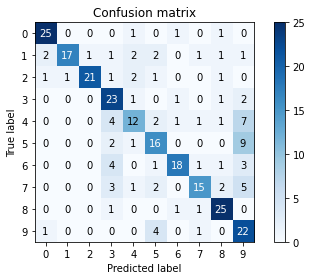

In [ ]:
evaluate(results_fname="results_ia.csv")

Classification accuracy based on 'results.csv': 89.50%
Classification F1-score based on 'results.csv': 0.896


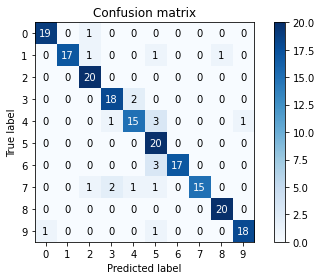

In [ ]:
evaluate(results_fname="results.csv")